In [1]:
import torch

In [2]:
ckpt = torch.load("results.pkl")


In [4]:
for k, v in ckpt.items():
    print(k, type(v))
    break
        

preds <class 'dict'>


In [11]:
len(v.keys())

78143

In [13]:
v[17916].shape

(6, 30, 2)

In [14]:
import argparse
import os
os.umask(0)
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"
import pickle
import sys
from importlib import import_module

import torch
from torch.utils.data import DataLoader, Sampler
from torch.utils.data.distributed import DistributedSampler
from tqdm import tqdm

from data import ArgoTestDataset
from utils import Logger, load_pretrain

In [16]:
from lanegcn import get_model
config, _, collate_fn, net, loss, post_process, opt = get_model()

In [18]:
# Data loader for evaluation
dataset = ArgoTestDataset('dataset/preprocess/test_test.p', config, train=False)
# dataset = ArgoTestDataset('test', config, train=False)
data_loader = DataLoader(
    dataset,
    batch_size=config["val_batch_size"],
    num_workers=config["val_workers"],
    collate_fn=collate_fn,
    shuffle=True,
    pin_memory=True,
)

In [19]:
for ii, data in tqdm(enumerate(data_loader)):
    data = dict(data)
    break

0it [00:00, ?it/s]


In [23]:
data.keys()

dict_keys(['orig', 'theta', 'rot', 'feats', 'ctrs', 'graph', 'argo_id', 'city'])

In [27]:
data['feats'][0][0].size()

torch.Size([20, 3])

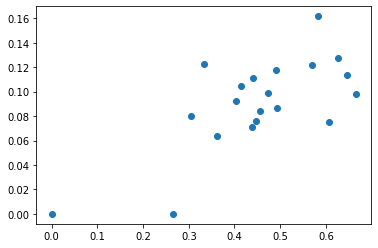

In [31]:
traj = data['feats'][0][0]
import matplotlib.pyplot as plt
plt.scatter(traj[:,0], traj[:,1])